# CS 595 Project
## Analysis on Reddit post data

In this project we provide some analysis on what time of day do posts on Reddit get the most upvotes. This analysis includes trimming data down to 100,000 objects each file, removing dublicate posts at the same time to reduce the data and setting a max upvote score to reduce outliers. 

## Import Reddit Data

Here is where we gather the submit time of the data and append it to our dataframe. This allows us to visualize and analyze the data better. Having to convert the time from timestamps so that we could compare the data and plot it.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib as plt
import json

data = pd.DataFrame([])
count = 0
with open('out0.json') as f:
    for line in f:
        count = count + 1
        
        
        try:
            json_obj = json.loads('[' + line + ']')
            
            val = dt.datetime.fromtimestamp(json_obj[0]['submit_time'])
            val = val + dt.timedelta(hours=4)
            val = val.strftime('%H%M')
            json_obj[0]['int_time'] = val
        
            data = data.append(pd.DataFrame(pd.read_json(json.dumps(json_obj))))
        except ValueError as e:
            continue

In [2]:
data

,score,submit_time,subreddit,int_time
0,108,2019-08-01 22:35:06,muslimculture,2235
0,134,2019-08-01 05:00:56,Ben10,500
0,3168,2019-08-01 13:00:29,AskHistorians,1300
0,107,2019-08-01 00:00:06,LightsCameraPodcast,0
0,1690,2019-08-01 00:00:06,jacksepticeye,0
...,...,...,...,...
0,454,2019-08-03 19:15:56,stlouisblues,1915
0,133,2019-08-03 19:16:00,dankmemes,1916
0,1135,2019-08-03 19:16:02,kingdomcome,1916
0,173,2019-08-03 19:16:02,Tinder,1916


## Filtering Data

Here we are dropping the duplicate data that is posted at the same time and keeping the first post. Then we drop the duplicate scores and only gather data that has less than 15000 upvotes. This allows us to remove data in a way where it will not clog our data plots and remove outliers.

In [26]:
data = data.drop_duplicates(subset='int_time', keep='first')

In [4]:
data = data.drop_duplicates(subset='score', keep='first')

### Plot of Data without reducing score:

We can see here that there is too much data plots bunched at the bottom. By reducing the score we will be able to see a better correlation of time vs score.

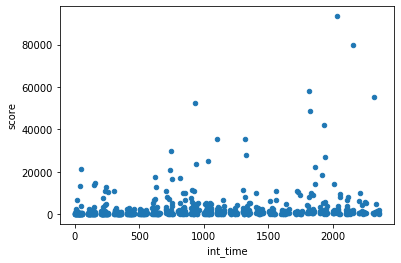

In [27]:
data.plot(x ='int_time', y='score', kind = 'scatter')	

### Plot of Data with reducing max score down to 1000:

Here we can see a better correlation of the data.

In [28]:
data_plot = data[data.score < 1000]

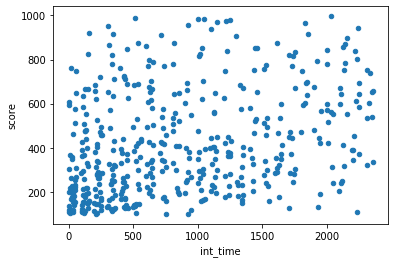

In [29]:
data_plot.plot(x ='int_time', y='score', kind = 'scatter')	

### Plot of Data with reducing max score down to 600:

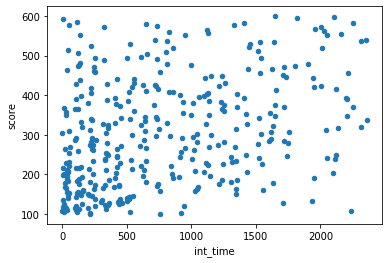

In [8]:
data_plot1 = data[data.score < 600]
data_plot1.plot(x ='int_time', y='score', kind = 'scatter')	

### Analyzing data between midnight and 5am

Here we can see the mean score is 1098 at the mean time of 2am.

In [9]:
data_morning = data.where(data.int_time < 500)

In [10]:
data_morning

,score,submit_time,subreddit,int_time
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,107.0,2019-08-01 00:00:06,LightsCameraPodcast,0.0
0,305.0,2019-08-01 00:01:00,ChapoTrapHouse,1.0
...,...,...,...,...
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN


In [11]:
data_morning.describe()

,score,int_time
count,224.000000,224.000000
mean,1098.611607,208.982143
std,2663.715032,142.029744
min,100.000000,0.000000
25%,181.250000,101.750000
50%,315.500000,212.000000
75%,694.500000,335.250000
max,21558.000000,459.000000


### Analyzing data between 5am and 10am

Here we can see the mean score is 2746 at the mean time of 7:30am.

In [12]:
data_5_to_10 = data.where((data.int_time > 500) & (data.int_time < 1000))

In [13]:
data_5_to_10

,score,submit_time,subreddit,int_time
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
...,...,...,...,...
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN


In [14]:
data_5_to_10.describe()

,score,int_time
count,168.000000,168.000000
mean,2746.982143,736.797619
std,5868.369523,141.321291
min,101.000000,502.000000
25%,353.500000,620.750000
50%,686.500000,736.500000
75%,2226.000000,853.250000
max,52587.000000,959.000000


### Analyzing data between 10am to 3pm

Here we can see the mean score is 2294 at the mean time of 12pm.

In [15]:
data_10_to_3 = data.where((data.int_time > 1000) & (data.int_time < 1500))

In [16]:
data_10_to_3

,score,submit_time,subreddit,int_time
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,3168.0,2019-08-01 13:00:29,AskHistorians,1300.0
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
...,...,...,...,...
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN


In [17]:
data_10_to_3.describe()

,score,int_time
count,143.000000,143.000000
mean,2294.090909,1216.923077
std,5287.835389,141.264066
min,150.000000,1001.000000
25%,362.500000,1104.500000
50%,827.000000,1217.000000
75%,1851.000000,1337.000000
max,35563.000000,1459.000000


### Analyzing data between 3pm to 8pm

Here we can see the mean score is 3876 at the mean time of 5pm.

In [18]:
data_3_to_8 = data.where((data.int_time > 1500) & (data.int_time < 2000))

In [19]:
data_3_to_8

,score,submit_time,subreddit,int_time
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
...,...,...,...,...
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN


In [20]:
data_3_to_8.describe()

,score,int_time
count,108.000000,108.000000
mean,3876.111111,1729.416667
std,9009.465468,142.415289
min,127.000000,1503.000000
25%,454.500000,1612.750000
50%,895.500000,1731.500000
75%,2351.000000,1846.750000
max,58311.000000,1958.000000


### Analyzing data between 8pm to midnight

Here we can see the mean score is 4593 at the mean time of 9pm. This timeframe has the highest score average than the rest and the most popular post time is around 9pm. This could mean that posting later in the day will result in a higher upvote score.

In [21]:
data_8_to_12 = data.where(data.int_time > 2000)

In [22]:
data_8_to_12

,score,submit_time,subreddit,int_time
0,108.0,2019-08-01 22:35:06,muslimculture,2235.0
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
0,NaN,NaT,NaN,NaN
...,...,...,...,...
0,540.0,2019-08-01 23:50:00,nfl,2350.0
0,651.0,2019-08-01 23:52:01,xqcow,2352.0
0,1786.0,2019-08-01 23:56:03,Military,2356.0
0,338.0,2019-08-01 23:58:02,ChurchOfMinaAshido,2358.0


In [23]:
data_8_to_12.describe()

,score,int_time
count,82.000000,82.000000
mean,4593.146341,2160.707317
std,14607.779750,111.709001
min,108.000000,2001.000000
25%,556.250000,2052.500000
50%,842.500000,2138.000000
75%,1891.750000,2247.500000
max,93382.000000,2359.000000


## Original data that was filtered

In [24]:
data

,score,submit_time,subreddit,int_time
0,108,2019-08-01 22:35:06,muslimculture,2235
0,134,2019-08-01 05:00:56,Ben10,500
0,3168,2019-08-01 13:00:29,AskHistorians,1300
0,107,2019-08-01 00:00:06,LightsCameraPodcast,0
0,305,2019-08-01 00:01:00,ChapoTrapHouse,1
...,...,...,...,...
0,540,2019-08-01 23:50:00,nfl,2350
0,651,2019-08-01 23:52:01,xqcow,2352
0,1786,2019-08-01 23:56:03,Military,2356
0,338,2019-08-01 23:58:02,ChurchOfMinaAshido,2358


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B55ECE7688>,
      dtype=object)

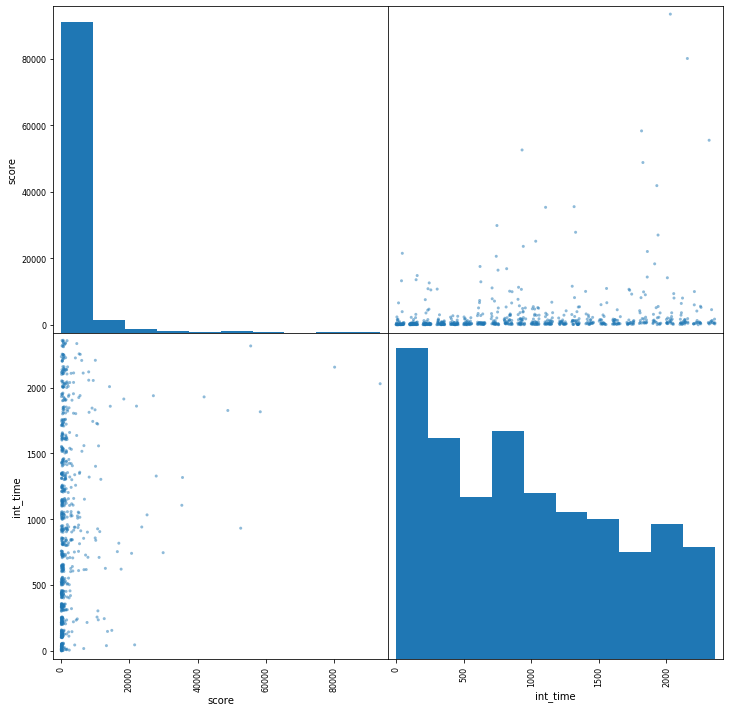

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12, 12))

## Subreddit: Analysis on subreddits containing 'meme'

In [31]:
data_meme = data[data.subreddit.str.contains('meme', na=False)]
data_meme

,score,submit_time,subreddit,int_time
0,1732,2019-08-01 00:14:04,memes,14
0,13304,2019-08-01 00:40:02,dankmemes,40
0,665,2019-08-01 01:25:01,memes,125
0,189,2019-08-01 01:32:08,antimeme,132
0,482,2019-08-01 01:37:02,Animemes,137
0,149,2019-08-01 01:47:00,dndmemes,147
0,147,2019-08-01 02:10:00,animememes,210
0,620,2019-08-01 02:15:00,Animemes,215
0,7635,2019-08-01 02:16:01,memes,216
0,4778,2019-08-01 02:43:00,dankmemes,243


In [32]:
data_meme.describe()

,score,int_time
count,53.000000,53.000000
mean,6675.943396,931.924528
std,9548.523795,673.171479
min,138.000000,14.000000
25%,665.000000,358.000000
50%,2833.000000,709.000000
75%,9104.000000,1357.000000
max,52587.000000,2207.000000


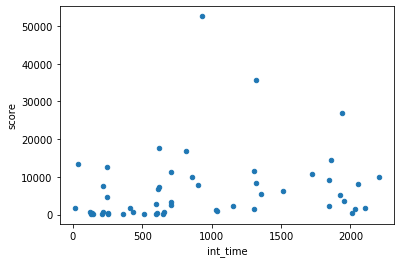

In [33]:
data_meme.plot(x ='int_time', y='score', kind = 'scatter')	

# Linear Regression

In [34]:
data_l = data[data.score < 3000]

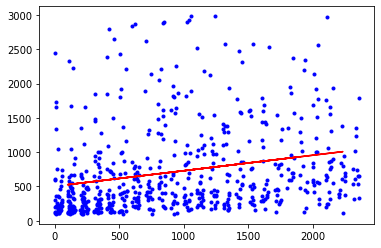

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

X = data_l['int_time'].values.reshape(-1, 1)
y = data_l['score'].values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)
#X_test = np.linspace(0, 3, 10000).reshape(-1, 1)

predict = lin_reg.predict(X_test)
plt.plot(X, y, 'b.')
plt.plot(X_test, predict, "r-")

## Actual VS Predicted Data

In [36]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predict.flatten()})
df

,Actual,Predicted
0,751,827.818980
1,287,526.542434
2,674,933.435028
3,756,846.550031
4,121,527.219460
5,584,529.024862
6,307,868.214862
7,802,1008.133558
8,1888,742.513711
9,2312,832.106811


## Linear Regression: Meme Subreddit(s)

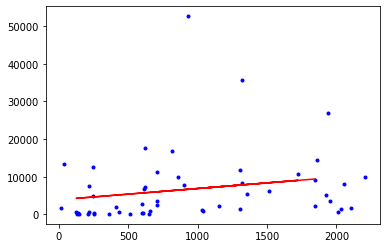

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

X = data_meme['int_time'].values.reshape(-1, 1)
y = data_meme['score'].values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)
#X_test = np.linspace(0, 3, 10000).reshape(-1, 1)

predict_meme = lin_reg.predict(X_test)
plt.plot(X, y, 'b.')
plt.plot(X_test, predict_meme, "r-")

In [40]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predict_meme.flatten()})
df

,Actual,Predicted
0,2366,9404.171797
1,1098,6965.683212
2,8251,7834.226882
3,852,6986.576015
4,495,4646.582073
5,665,4267.526932
6,52587,6676.168656
7,10750,9037.055401
8,10019,6455.301880
9,2622,6010.583644


# Logistic Regression

In [41]:
data_logistic = data[data.score < 3000]

C:\Users\kayma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kayma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kayma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


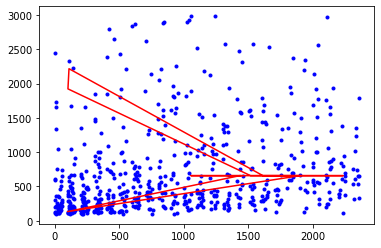

In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

X = data_logistic['int_time'].values.reshape(-1, 1)
y = data_logistic['score'].values.reshape(-1, 1)

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

predict_logistic = log_reg.predict(X_test)
plt.plot(X, y, 'b.')
plt.plot(X_test, predict_logistic, "r-")

## Actual VS Predicted Data

In [43]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predict_logistic.flatten()})
df

,Actual,Predicted
0,751,658
1,287,134
2,674,658
3,756,658
4,121,1923
5,584,2217
6,307,658
7,802,658
8,1888,658
9,2312,658


## Logistic Regression: Meme Subreddit(s)

C:\Users\kayma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kayma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kayma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


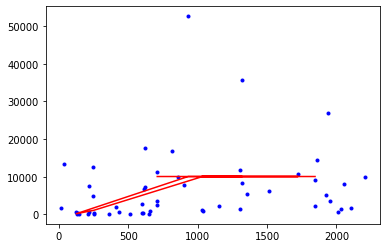

In [46]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

X = data_meme['int_time'].values.reshape(-1, 1)
y = data_meme['score'].values.reshape(-1, 1)

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

predict_logistic_meme = log_reg.predict(X_test)
plt.plot(X, y, 'b.')
plt.plot(X_test, predict_logistic_meme, "r-")

## Actual VS Predicted Data

In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predict_logistic_meme.flatten()})
df

,Actual,Predicted
0,2366,10063
1,1098,10063
2,8251,10063
3,852,10063
4,495,1098
5,665,185
6,52587,10063
7,10750,10063
8,10019,10063
9,2622,10063


# Polynomial Regression

Trained Theta:
[452.26521311] [[-8.58518130e-01  5.04438811e-03 -6.43330005e-06  3.21836883e-09
  -5.62044075e-13]]


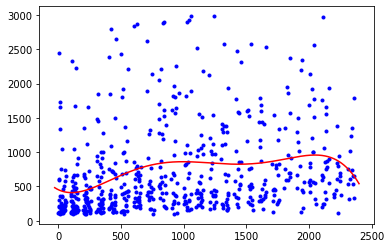

In [48]:
from sklearn.preprocessing import PolynomialFeatures


# Adjust degree to observe change in model
degree = 5

X = data_l['int_time'].values.reshape(-1, 1)
y = data_l['score'].values.reshape(-1, 1)

# Add extra features using PolynomialFeatures transform
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the modified input data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Trained Theta:")
print(lin_reg.intercept_, lin_reg.coef_)


# Prepare test data
x_test = [[1*x] for x in range(-30,2400)]
test_X_poly = poly_features.fit_transform(x_test)

# Predict using test data
predict_poly = lin_reg.predict(test_X_poly)

# Plot Scatter and Model
plt.plot(X,y,"b.")
plt.plot(x_test, predict_poly,"r-")

## Polynomial Regression: Learning Curves

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
   
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=10, random_state=0)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, test_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.legend()
    plt.axis([0, 80, 0, 2000])

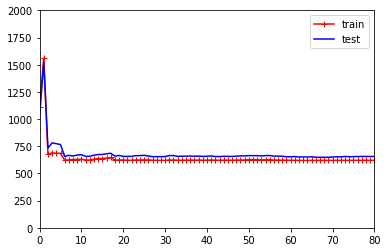

In [50]:
# Demonstrate our plot
X = data_l['int_time'].values.reshape(-1, 1)
y = data_l['score'].values.reshape(-1, 1)

plot_learning_curves(LinearRegression(), X, y)

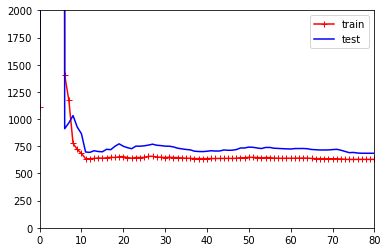

In [51]:
degree = 10

model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(model, X, y)

In [52]:
data['score'].max()

93382

In [53]:
data['score'].min()

100